In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split


import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

from sklearn.feature_selection import RFECV

In [3]:
import xgboost
from xgboost import plot_importance
from xgboost import plot_tree
from xgboost import XGBClassifier

In [4]:
tourney_result = pd.read_csv('../input/kaggle_data/MNCAATourneyCompactResults.csv')

tourney_result = tourney_result.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'],axis=1)

In [5]:
coty = pd.read_csv('../input/coty.csv')
coty

,Season,TeamID,coty
0,1985,1102,0
1,1985,1103,0
2,1985,1104,0
3,1985,1106,0
4,1985,1108,0
5,1985,1109,0
6,1985,1110,0
7,1985,1111,0
8,1985,1112,0
9,1985,1113,0


In [6]:
tm_to_pct = pd.read_csv('../input/self_calculated/tm_to_pct.csv')

opp_to_pct = pd.read_csv('../input/self_calculated/opp_to_pct.csv')

tm_orb_pct = pd.read_csv('../input/self_calculated/tm_orb_pct.csv')

tm_drb_pct = pd.read_csv('../input/self_calculated/tm_drb_pct.csv')

tm_efg_pct = pd.read_csv('../input/self_calculated/tm_efg_pct.csv')

opp_efg_pct = pd.read_csv('../input/self_calculated/opp_efg_pct.csv')

tm_fta_rate = pd.read_csv('../input/self_calculated/tm_fta_rate.csv')

opp_fta_rate = pd.read_csv('../input/self_calculated/opp_fta_rate.csv')

tm_off_eff = pd.read_csv('../input/self_calculated/tm_off_eff.csv')

tm_def_eff = pd.read_csv('../input/self_calculated/tm_def_eff.csv')

tm_ft_pct = pd.read_csv('../input/self_calculated/tm_ft_pct.csv')

adj_eff = pd.read_csv('../input/self_calculated/adjusted_efficiencies.csv')

In [7]:
all_teams = tm_to_pct.merge(opp_to_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_efg_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(opp_efg_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_orb_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_drb_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_fta_rate,on=['Season','TeamID'])

all_teams = all_teams.merge(opp_fta_rate,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_ft_pct, on=['Season','TeamID'])

all_teams = all_teams.merge(adj_eff, on=['Season','TeamID'])

all_teams = all_teams.merge(coty,on=['Season','TeamID'])

all_teams = all_teams.drop(['raw_stat_x','raw_stat_y'],axis=1)

all_teams.columns = ['Season','TeamID','tm_to_pct','opp_to_pct','tm_efg_pct','opp_efg_pct','tm_orb_pct','tm_drb_pct','tm_fta_rate','opp_fta_rate','tm_ft_pct','RawNetEff','AdjNetEff','coty']

# all_teams.columns = ['Season','TeamID','tm_to_pct','opp_to_pct','RawNetEff','AdjNetEff','coty']

all_teams = all_teams.drop(['RawNetEff'],axis=1)

all_teams.columns

Index(['Season', 'TeamID', 'tm_to_pct', 'opp_to_pct', 'tm_efg_pct',
       'opp_efg_pct', 'tm_orb_pct', 'tm_drb_pct', 'tm_fta_rate',
       'opp_fta_rate', 'tm_ft_pct', 'AdjNetEff', 'coty'],
      dtype='object')

In [8]:
df1 = tourney_result
df2 = all_teams

df = df1.merge(df2,left_on=['Season','WTeamID'],right_on=['Season','TeamID'], how="inner")

df = df.drop(['TeamID'],axis=1)

df = df.merge(df2,left_on=['Season','LTeamID'],right_on=['Season','TeamID'],how='inner')
df = df.drop(['TeamID'],axis=1)

print(df.columns)

Index(['Season', 'WTeamID', 'LTeamID', 'tm_to_pct_x', 'opp_to_pct_x',
       'tm_efg_pct_x', 'opp_efg_pct_x', 'tm_orb_pct_x', 'tm_drb_pct_x',
       'tm_fta_rate_x', 'opp_fta_rate_x', 'tm_ft_pct_x', 'AdjNetEff_x',
       'coty_x', 'tm_to_pct_y', 'opp_to_pct_y', 'tm_efg_pct_y',
       'opp_efg_pct_y', 'tm_orb_pct_y', 'tm_drb_pct_y', 'tm_fta_rate_y',
       'opp_fta_rate_y', 'tm_ft_pct_y', 'AdjNetEff_y', 'coty_y'],
      dtype='object')


In [9]:
df_win = df.copy()

df_win['tm_to_pct_x'] = df_win['tm_to_pct_x']/100
df_win['tm_to_pct_y'] = df_win['tm_to_pct_y']/100

df_win['opp_to_pct_x'] = df_win['opp_to_pct_x']/100
df_win['opp_to_pct_y'] = df_win['opp_to_pct_y']/100

df_lose = df_win.copy()

df_lose['tm_to_pct_x'] = df_win['tm_to_pct_y']
df_lose['tm_to_pct_y'] = df_win['tm_to_pct_x']

df_lose['tm_efg_pct_x'] = df_win['tm_efg_pct_y']
df_lose['tm_efg_pct_y'] = df_win['tm_efg_pct_x']

df_lose['tm_orb_pct_x'] = df_win['tm_orb_pct_y']
df_lose['tm_orb_pct_y'] = df_win['tm_orb_pct_x']

df_lose['tm_fta_rate_x'] = df_win['tm_fta_rate_y']
df_lose['tm_fta_rate_y'] = df_win['tm_fta_rate_x']

df_lose['opp_to_pct_x'] = df_win['opp_to_pct_y']
df_lose['opp_to_pct_y'] = df_win['opp_to_pct_x']

df_lose['opp_efg_pct_x'] = df_win['opp_efg_pct_y']
df_lose['opp_efg_pct_y'] = df_win['opp_efg_pct_x']

df_lose['tm_drb_pct_x'] = df_win['tm_drb_pct_y']
df_lose['tm_drb_pct_y'] = df_win['tm_drb_pct_x']

df_lose['opp_fta_rate_x'] = df_win['opp_fta_rate_y']
df_lose['opp_fta_rate_y'] = df_win['opp_fta_rate_x']

df_lose['tm_ft_pct_x'] = df_win['tm_ft_pct_y']
df_lose['tm_ft_pct_y'] = df_win['tm_ft_pct_x']

df_lose['coty_x'] = df_win['coty_y']
df_lose['coty_y'] = df_win['coty_x']


df_lose['AdjNetEff_x'] = df_win['AdjNetEff_y']
df_lose['AdjNetEff_y'] = df_win['AdjNetEff_x']

df_lose

,Season,WTeamID,LTeamID,tm_to_pct_x,opp_to_pct_x,tm_efg_pct_x,opp_efg_pct_x,tm_orb_pct_x,tm_drb_pct_x,tm_fta_rate_x,...,opp_to_pct_y,tm_efg_pct_y,opp_efg_pct_y,tm_orb_pct_y,tm_drb_pct_y,tm_fta_rate_y,opp_fta_rate_y,tm_ft_pct_y,AdjNetEff_y,coty_y
0,2003,1421,1411,0.157748,0.144066,0.485771,0.522823,0.329131,0.658348,0.484603,...,0.118919,0.479754,0.532603,0.350514,0.636009,0.362902,0.376445,0.762768,-15.290412,0
1,2003,1112,1436,0.157558,0.146190,0.488483,0.485285,0.366334,0.712340,0.365030,...,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,27.877550,0
2,2003,1112,1211,0.151288,0.159322,0.545311,0.480530,0.366716,0.714861,0.446145,...,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,27.877550,0
3,2003,1112,1323,0.120951,0.140477,0.541660,0.448696,0.309392,0.684514,0.391508,...,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,27.877550,0
4,2003,1113,1272,0.136522,0.161615,0.518368,0.455917,0.370133,0.690344,0.397734,...,0.174627,0.534947,0.486342,0.414094,0.701953,0.473241,0.376967,0.669737,18.390055,0
5,2003,1141,1166,0.144084,0.184280,0.564683,0.472223,0.355384,0.678357,0.373890,...,0.169670,0.565467,0.493446,0.374608,0.666246,0.469109,0.356625,0.765753,10.344505,0
6,2003,1143,1301,0.153161,0.172368,0.545492,0.486652,0.307967,0.701017,0.409730,...,0.165912,0.529460,0.489442,0.333434,0.716649,0.359461,0.311497,0.685512,13.464684,0
7,2003,1163,1140,0.155805,0.173801,0.531840,0.429978,0.350585,0.695281,0.487125,...,0.143282,0.532739,0.423644,0.397570,0.671671,0.363548,0.342219,0.674208,18.387632,1
8,2003,1163,1390,0.144211,0.152791,0.516059,0.449102,0.398954,0.711946,0.372233,...,0.143282,0.532739,0.423644,0.397570,0.671671,0.363548,0.342219,0.674208,18.387632,1
9,2003,1181,1161,0.171571,0.137448,0.558423,0.493442,0.370069,0.654704,0.469218,...,0.186465,0.538401,0.468795,0.383807,0.669683,0.486971,0.389676,0.709026,23.058384,0


In [10]:
df_win['result'] = 1
df_lose['result'] = 0

df_final = pd.concat((df_win,df_lose)).reset_index(drop=True)

df_final['AdjNetEff_Diff'] = df_final['AdjNetEff_x'] - df_final['AdjNetEff_y']

df_final = df_final[df_final['Season']<2015]

df_final = df_final.drop(['Season','WTeamID','LTeamID','AdjNetEff_x','AdjNetEff_y'],axis=1)
#df_final = df_final.drop(['Season','WTeamID','LTeamID'],axis=1)

df_final

,tm_to_pct_x,opp_to_pct_x,tm_efg_pct_x,opp_efg_pct_x,tm_orb_pct_x,tm_drb_pct_x,tm_fta_rate_x,opp_fta_rate_x,tm_ft_pct_x,coty_x,...,tm_efg_pct_y,opp_efg_pct_y,tm_orb_pct_y,tm_drb_pct_y,tm_fta_rate_y,opp_fta_rate_y,tm_ft_pct_y,coty_y,result,AdjNetEff_Diff
0,0.173263,0.118919,0.479754,0.532603,0.350514,0.636009,0.362902,0.376445,0.762768,0,...,0.485771,0.522823,0.329131,0.658348,0.484603,0.361217,0.619952,0,1,-6.491479
1,0.132586,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,0,...,0.488483,0.485285,0.366334,0.712340,0.365030,0.314083,0.657848,0,1,25.295647
2,0.132586,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,0,...,0.545311,0.480530,0.366716,0.714861,0.446145,0.324519,0.721204,0,1,11.803546
3,0.132586,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,0,...,0.541660,0.448696,0.309392,0.684514,0.391508,0.267544,0.759887,0,1,6.483768
4,0.141060,0.174627,0.534947,0.486342,0.414094,0.701953,0.473241,0.376967,0.669737,0,...,0.518368,0.455917,0.370133,0.690344,0.397734,0.378112,0.653614,0,1,1.013994
5,0.186654,0.169670,0.565467,0.493446,0.374608,0.666246,0.469109,0.356625,0.765753,0,...,0.564683,0.472223,0.355384,0.678357,0.373890,0.301040,0.692890,0,1,-11.255168
6,0.142236,0.165912,0.529460,0.489442,0.333434,0.716649,0.359461,0.311497,0.685512,0,...,0.545492,0.486652,0.307967,0.701017,0.409730,0.405147,0.770358,0,1,0.215371
7,0.147275,0.143282,0.532739,0.423644,0.397570,0.671671,0.363548,0.342219,0.674208,1,...,0.531840,0.429978,0.350585,0.695281,0.487125,0.439414,0.753004,0,1,-1.433052
8,0.147275,0.143282,0.532739,0.423644,0.397570,0.671671,0.363548,0.342219,0.674208,1,...,0.516059,0.449102,0.398954,0.711946,0.372233,0.361062,0.675466,0,1,3.181876
9,0.140377,0.186465,0.538401,0.468795,0.383807,0.669683,0.486971,0.389676,0.709026,0,...,0.558423,0.493442,0.370069,0.654704,0.469218,0.383487,0.700549,0,1,17.349056


In [11]:
X = df_final.drop('result',axis=1)
y = df_final.result
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [12]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method)
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2)
    return (auc_score, fpr_df, tpr_df)

In [13]:
logreg = LogisticRegression()
params = {'C':np.logspace(start=-5,stop=3,num=9)}
clf = GridSearchCV(logreg,params,scoring='neg_log_loss',refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.5411, with best C: 0.001


In [14]:
result = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

cnf_matrix

array([[115,  42],
       [ 46, 111]], dtype=int64)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Log-Loss:',metrics.log_loss(y_test,y_pred))

Accuracy: 0.7197452229299363
Precision: 0.7254901960784313
Recall: 0.7070063694267515
Log-Loss: 9.679764031350983


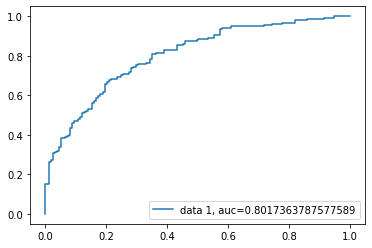

In [17]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

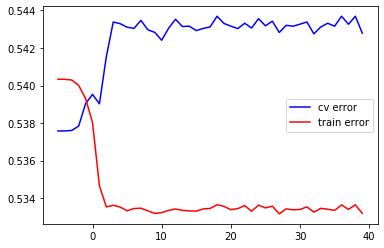

In [18]:
alpha=[10**x for x in np.arange(-5, 40, dtype=float)]
log_alpha=np.arange(-5,40)

cv_err=[]
train_err=[]
for a in alpha:
    clf=LogisticRegression(C=a, penalty='l2', class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf=CalibratedClassifierCV(clf)
    sig_clf.fit(X_train, y_train)
    
    predict_y=sig_clf.predict_proba(X_test)
    cv_err.append(log_loss(y_test, predict_y))
    
    predict_y=sig_clf.predict_proba(X_train)
    train_err.append(log_loss(y_train, predict_y))

plt.plot(log_alpha, cv_err, label='cv error', c='b')
plt.plot(log_alpha, train_err, label='train error', c='r')
plt.legend()
plt.show()

In [19]:
alpha[np.argmin(cv_err)]

1e-05

In [20]:
np.min(cv_err)

0.5375763285165747

In [21]:
logreg = LogisticRegression()
params = {'C':np.logspace(start=-5,stop=3,num=9)}
clf = GridSearchCV(logreg,params,scoring='neg_log_loss',refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.5411, with best C: 0.001


In [22]:
columns = X_train.columns
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, clf.best_estimator_.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)
clf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

Optimal number of features: 2


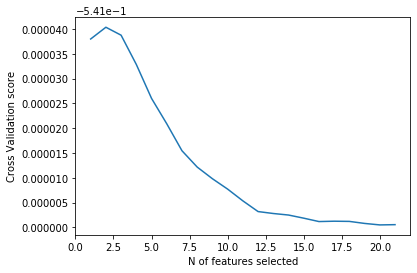

In [23]:
min_features_to_select = 1 
lr_clf = LogisticRegression(C=0.001, max_iter=100, solver='liblinear')
rfecv = RFECV(estimator=lr_clf, step=1, cv=10, scoring='neg_log_loss', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)

print('Optimal number of features: %d' % rfecv.n_features_)

plt.figure()
plt.xlabel('N of features selected')
plt.ylabel('Cross Validation score')
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [24]:
for i in range(X_train.shape[1]):
    print('Column %s, Selected %s, Rank %.3f' % (X_train.columns[i], rfecv.support_[i], rfecv.ranking_[i]))

Column tm_to_pct_x, Selected False, Rank 11.000
Column opp_to_pct_x, Selected False, Rank 12.000
Column tm_efg_pct_x, Selected False, Rank 6.000
Column opp_efg_pct_x, Selected False, Rank 16.000
Column tm_orb_pct_x, Selected False, Rank 7.000
Column tm_drb_pct_x, Selected False, Rank 9.000
Column tm_fta_rate_x, Selected False, Rank 3.000
Column opp_fta_rate_x, Selected False, Rank 15.000
Column tm_ft_pct_x, Selected False, Rank 10.000
Column coty_x, Selected False, Rank 2.000
Column tm_to_pct_y, Selected False, Rank 20.000
Column opp_to_pct_y, Selected False, Rank 14.000
Column tm_efg_pct_y, Selected False, Rank 19.000
Column opp_efg_pct_y, Selected False, Rank 13.000
Column tm_orb_pct_y, Selected False, Rank 4.000
Column tm_drb_pct_y, Selected False, Rank 18.000
Column tm_fta_rate_y, Selected False, Rank 8.000
Column opp_fta_rate_y, Selected False, Rank 17.000
Column tm_ft_pct_y, Selected False, Rank 5.000
Column coty_y, Selected True, Rank 1.000
Column AdjNetEff_Diff, Selected True, 

In [25]:
X = df_final[['AdjNetEff_Diff','coty_x','coty_y']]
y = df_final.result
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [26]:
from sklearn.linear_model import SGDClassifier
param_grid ={'alpha':np.logspace(start=-5,stop=3,num=9),
             'max_iter':[100,500,1000],
             'loss':['log','modified_huber']
}
SGD_Grid = GridSearchCV(SGDClassifier(),param_grid, cv=10,refit=True, verbose=0, scoring='neg_log_loss')
SGD_Grid.fit(X_train,y_train)
best_model(SGD_Grid)

-0.5425602921616093
{'alpha': 0.1, 'loss': 'log', 'max_iter': 100}
SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


Optimal number of features: 1


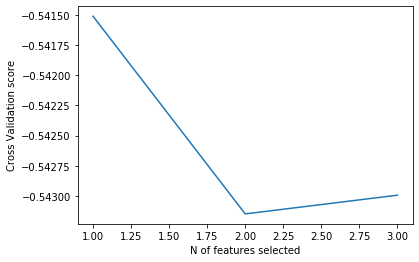

In [27]:
sgd_clf = SGD_Grid.best_estimator_
rfecv = RFECV(estimator=sgd_clf, step=1, cv=10, scoring='neg_log_loss', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)

print('Optimal number of features: %d' % rfecv.n_features_)

plt.figure()
plt.xlabel('N of features selected')
plt.ylabel('Cross Validation score')
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [28]:
for i in range(X_train.shape[1]):
    print('Column %s, Selected %s, Rank %.3f' % (X_train.columns[i], rfecv.support_[i], rfecv.ranking_[i]))

Column AdjNetEff_Diff, Selected True, Rank 1.000
Column coty_x, Selected False, Rank 3.000
Column coty_y, Selected False, Rank 2.000
